In [516]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Deterministic Model

In [517]:
b = 0.4
d = 0.32

X0 = 100
years = 20

pop = X0

# Construct first row of df
data = []
row = {"Time" : 0,
       "Population": pop}
data.append(row)
df = pd.DataFrame(data)


# Simulation over 20 years
for k in range(years):
    pop = (1 + b-d)*pop
    
    row = {"Time" : k+1,
           "Population" : pop}
    
    data.append(row)
    
df = pd.DataFrame(data) 

# Demographic Stochasticity

In [518]:
from scipy.stats import norm

bav = 0.4
dav = 0.32

bsd = 0.1
dsd = 0.07

X0 = 100
N_trials = 50
years = 21

df_dem = pd.DataFrame()

for i in range(N_trials): 
    X = np.zeros(years)
    X[0] = X0
    for j in range(1, years):
        b = norm.rvs(loc=bav, scale = bsd)
        d = norm.rvs(loc=dav, scale=dsd)
        
        X[j] = X[j-1] + (b - d) * X[j-1]
        
    df_temp = pd.DataFrame(X, columns = ["Trial %s"%(i+1)])
    df_dem = pd.concat([df_dem, df_temp], axis = 1)
    
    

# Environmental Stochasticity

In [519]:
from scipy.stats import uniform

b = 0.4
d = 0.32

bsd = 0.1
dsd = 0.07

X0 = 100
N_trials = 50
years = 21

df_env = pd.DataFrame()

for i in range(N_trials): 
    N = np.zeros(years)
    N[0] = X0
    for j in range(1, years):
        
        C = uniform.rvs()
        
        if C < 0.04:
            N[j] = N[j-1] + (0.3*b - 1.6375*d)*N[j-1]
        elif C >= 0.04:
            N[j] = N[j-1] + (b-d)*N[j-1]
        
    df_temp = pd.DataFrame(N, columns = ["Trial %s"%(i+1)])
    df_env = pd.concat([df_env, df_temp], axis = 1)
    

# Plots

Text(0, 0.5, 'Population')

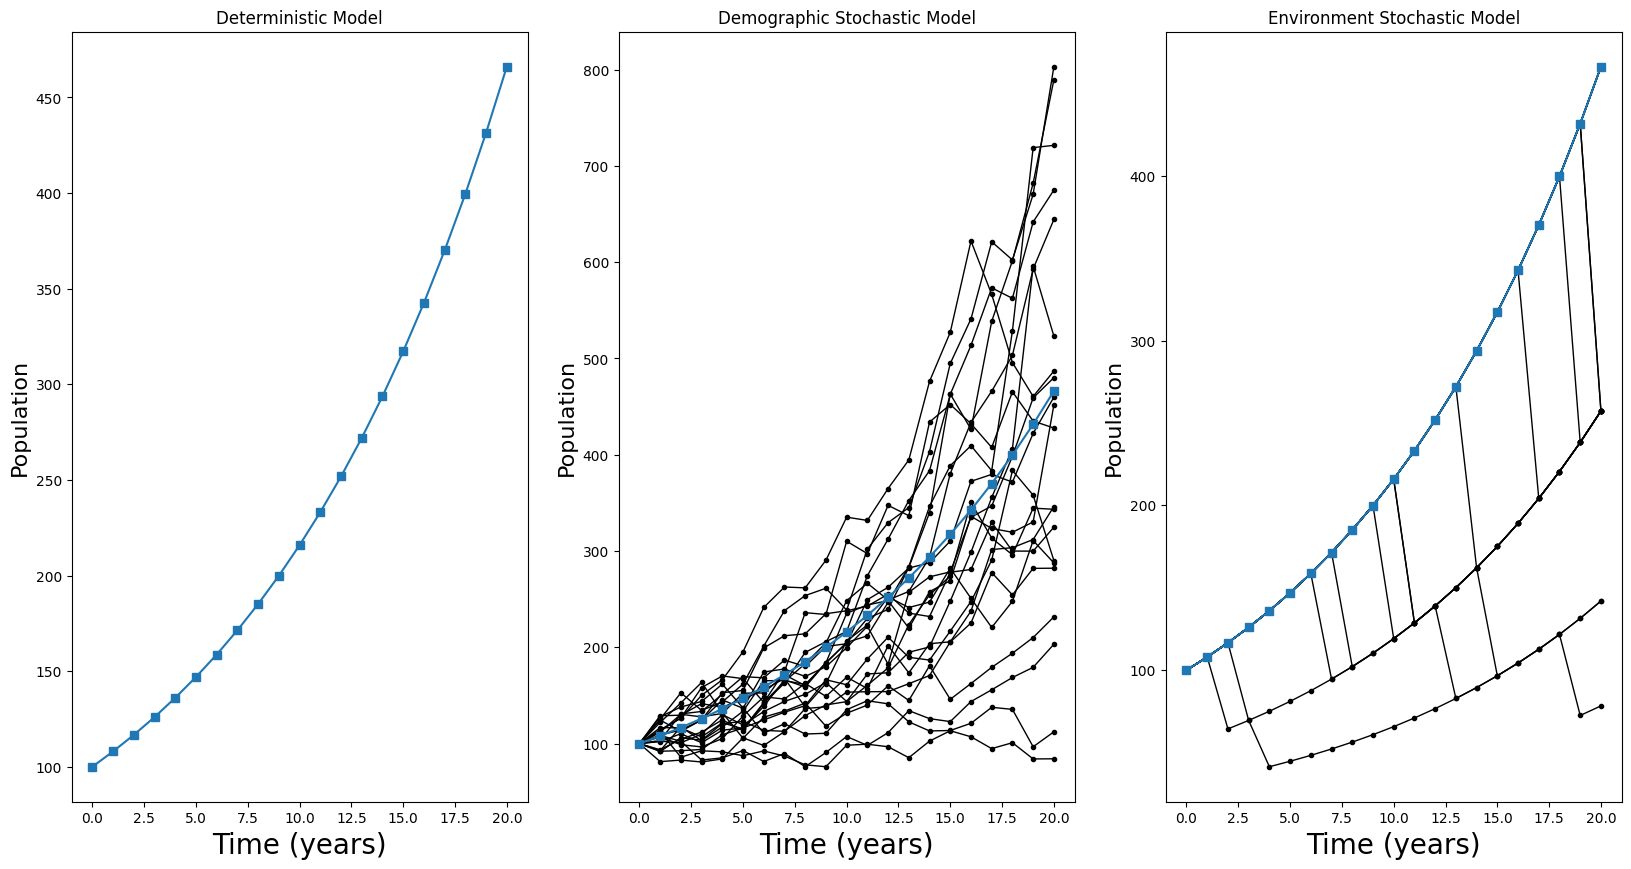

In [520]:
fig,(ax1, ax2, ax3) = plt.subplots(nrows= 1, ncols= 3, figsize = (20,10))

ax1.plot(df["Time"], df["Population"], marker = "s")
ax1.set_title("Deterministic Model")
ax1.set_xlabel('Time (years)', fontsize = 20)
ax1.set_ylabel('Population', fontsize = 16)

for i in range(years):
    ax2.plot(df_dem["Trial %s"%(i+1)], "k-o", linewidth = 1, markersize = 3)
ax2.plot(df["Time"], df["Population"], marker = "s")

ax2.set_title("Demographic Stochastic Model")
ax2.set_xlabel('Time (years)', fontsize = 20)
ax2.set_ylabel('Population', fontsize = 16)

for i in range(years):
    ax3.plot(df_env["Trial %s"%(i+1)], "k-o", linewidth = 1, markersize = 3)
ax3.plot(df["Time"], df["Population"], marker = "s")
ax3.set_title("Environment Stochastic Model")
ax3.set_xlabel("Time (years)", fontsize = 20)
ax3.set_ylabel("Population", fontsize = 16)

# Summary Statistics

## Question 5

Text(0, 0.5, 'Population')

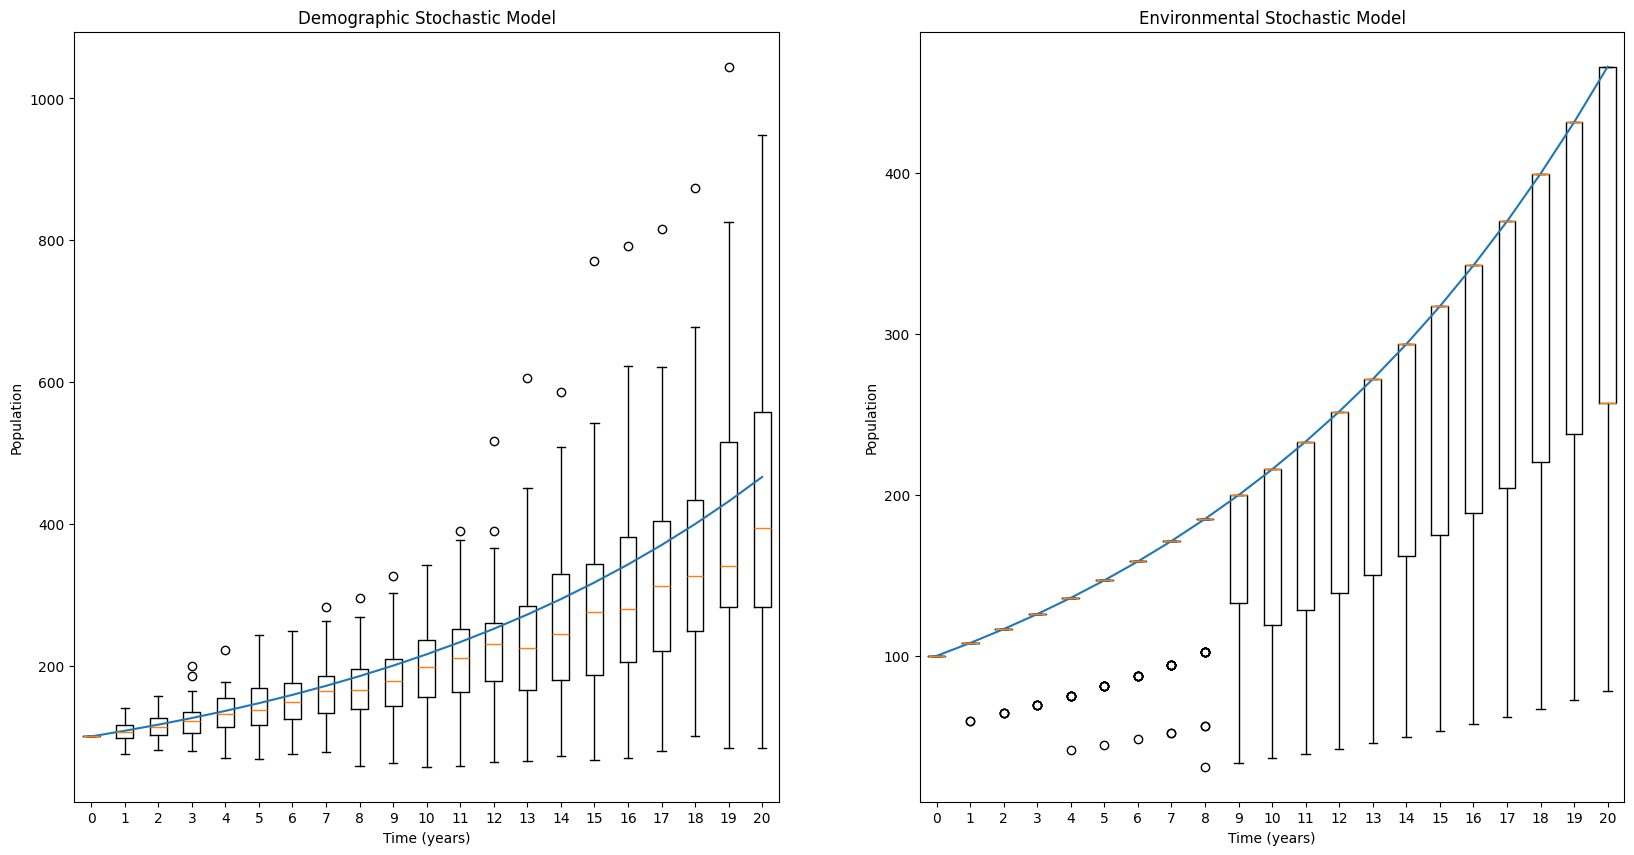

In [521]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (20,10))
ax1.boxplot(df_dem.to_numpy().transpose(), positions = np.arange(0, years))
ax1.plot(df["Time"], df["Population"])
ax1.set_title("Demographic Stochastic Model")
ax1.set_xlabel("Time (years)")
ax1.set_ylabel("Population")

ax2.boxplot(df_env.to_numpy().transpose(), positions = np.arange(0,years))
ax2.plot(df["Time"], df["Population"])
ax2.set_title("Environmental Stochastic Model")
ax2.set_xlabel("Time (years)")
ax2.set_ylabel("Population")


## Box Plot Analysis:


For the demographic stochastic model, the population fluctuates highly in comparison to the deterministic model. In almost every year, there are several trials that are considered outliers. However, within the first 10 years of the model, we can see that the mean in each year stays relatively close to the deterministic model. This changes after 10 years, as the mean in each year is consistently less than the deterministic model in the corresponding year. In comparison to the demographic stochastic model, the environmental stochaistic model is different in several ways. Most notably, within the first 10 years, every outlier occurs below the deterministic model. Furthermore, from years 0 to 8, the environmental model was enkeeping with the deterministic. After this point however, the variance in each year begins to increase while the population never surpasses the deterministic model. This trend makese sense because in a catastrophe year, large segements of the population die causing the population in the catastophe year to not surposs the population is a "normal" year represetned by the deterministic model. Furthoremore, the environmental model represents the chance that a catastrophe may occur. Thus, when one does not occur, it follows that the model will be consistent with the deterministic model.

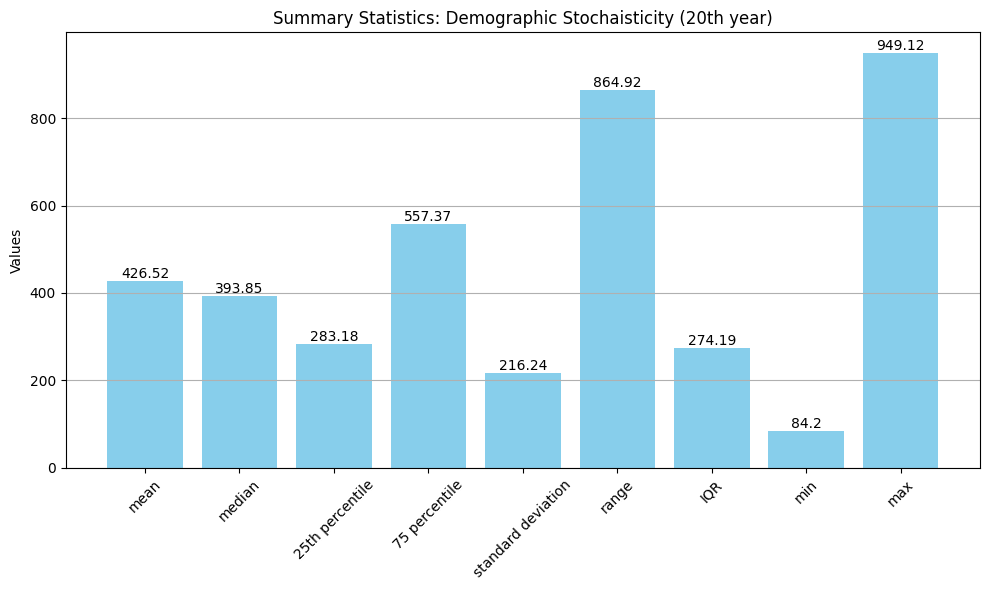

In [522]:
from scipy import stats

data = df_dem.transpose()[20]
summary_stats = stats.describe(data)
stats_names = ['mean', 'median', '25th percentile', '75 percentile', 'standard deviation', 'range', 'IQR', 'min', 'max']
stats_values = [
    summary_stats.mean,
    np.median(data),
    np.percentile(data, 25),
    np.percentile(data, 75),
    (summary_stats.variance)**(1/2),
    np.max(data) - np.min(data),
    np.percentile(data,75) - np.percentile(data, 25),
    np.min(data),
    np.max(data)
]

plt.figure(figsize=(10, 6))
bars = plt.bar(stats_names, stats_values, color='skyblue')

# Add labels on top of each bar
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), 
             ha='center', va='bottom', fontsize=10)  # Place the label

plt.title('Summary Statistics: Demographic Stochaisticity (20th year)')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

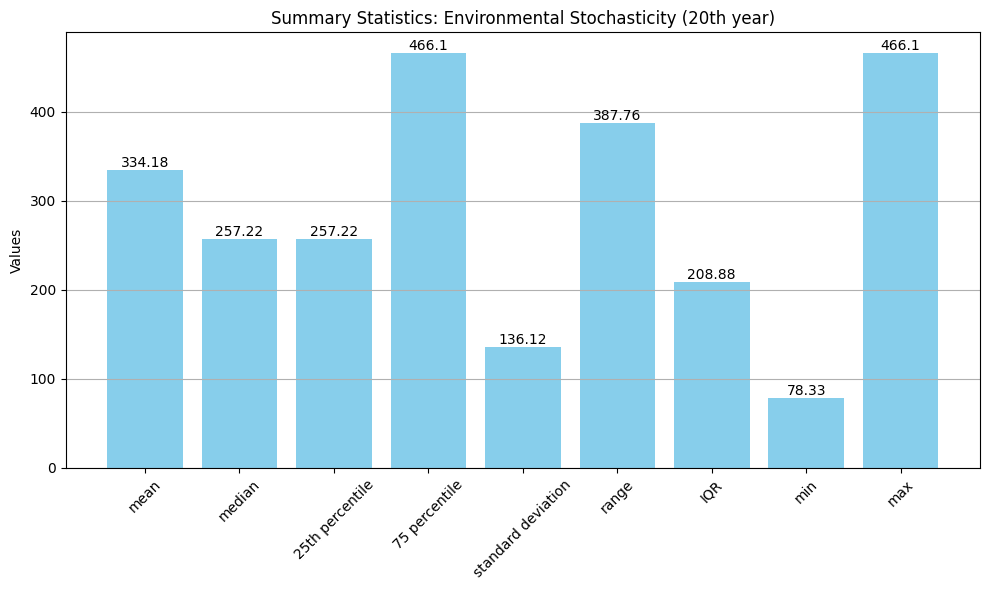

In [523]:
from scipy import stats

data = df_env.transpose()[20]
summary_stats = stats.describe(data)
stats_names = ['mean', 'median', '25th percentile', '75 percentile', 'standard deviation', 'range', 'IQR', 'min', 'max']
stats_values = [
    summary_stats.mean,
    np.median(data),
    np.percentile(data, 25),
    np.percentile(data, 75),
    (summary_stats.variance)**(1/2),
    np.max(data) - np.min(data),
    np.percentile(data,75) - np.percentile(data, 25),
    np.min(data),
    np.max(data)
]

plt.figure(figsize=(10, 6))
bars = plt.bar(stats_names, stats_values, color='skyblue')


for bar in bars:
    yval = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), 
             ha='center', va='bottom', fontsize=10)  

plt.title('Summary Statistics: Environmental Stochasticity (20th year)')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()  
plt.show()

Text(0.5, 1.0, 'Histogram: Environmental Stochasticity')

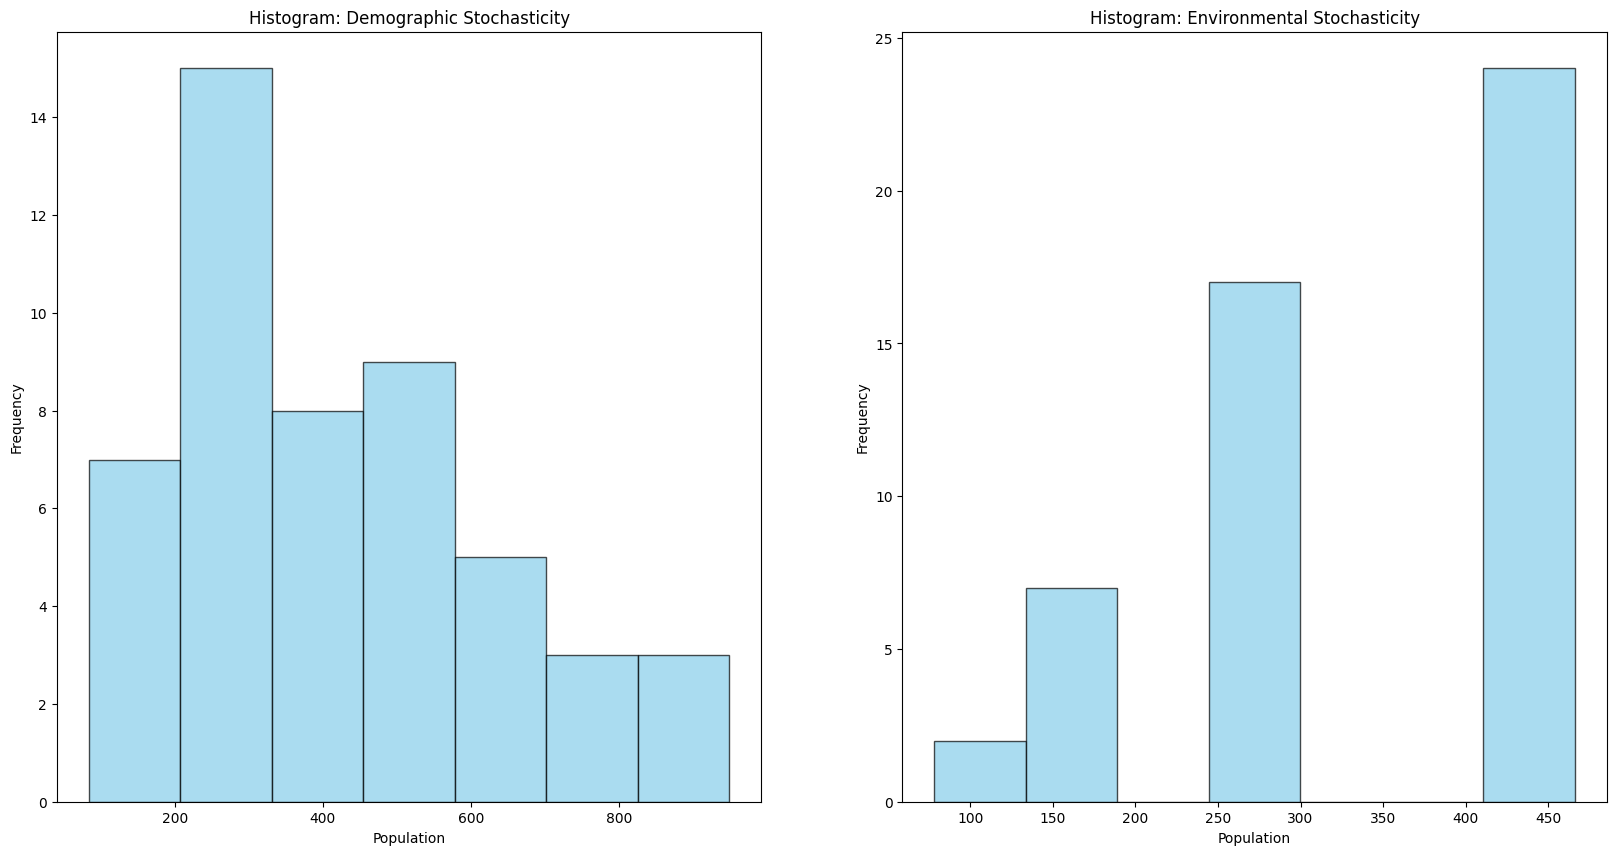

In [524]:
data_dem = df_dem.transpose()[20]
data_env = df_env.transpose()[20]

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))
ax1.hist(data_dem, bins = 7, color = "skyblue", edgecolor = "black", alpha = 0.7)
ax1.set_title("Histogram: Demographic Stochasticity")
ax1.set_xlabel("Population")
ax1.set_ylabel("Frequency")

ax2.hist(data_env, bins = 7, color = "skyblue", edgecolor = "black", alpha = 0.7)
ax2.set_xlabel("Population")
ax2.set_ylabel("Frequency")
ax2.set_title("Histogram: Environmental Stochasticity")



In [525]:
from scipy.stats import uniform

b = 0.4
d = 0.32

bsd = 0.1
dsd = 0.07

X0 = 100
N_trials = 50
years = 21

df_env = pd.DataFrame()

for i in range(N_trials): 
    N = np.zeros(years)
    N[0] = X0
    for j in range(1, years):
        
        C = uniform.rvs() 
        b = norm.rvs(loc=bav, scale = bsd)
        d = norm.rvs(loc=dav, scale=dsd)
        if C < 0.04:
            N[j] = N[j-1] + (0.3*b - 1.6375*d)*N[j-1]
        elif C >= 0.04:
            
            N[j] = N[j-1] + (b-d)*N[j-1]
        
    df_temp = pd.DataFrame(N, columns = ["Trial %s"%(i+1)])
    df_env = pd.concat([df_env, df_temp], axis = 1)
    
    
    

Text(0, 0.5, 'Population')

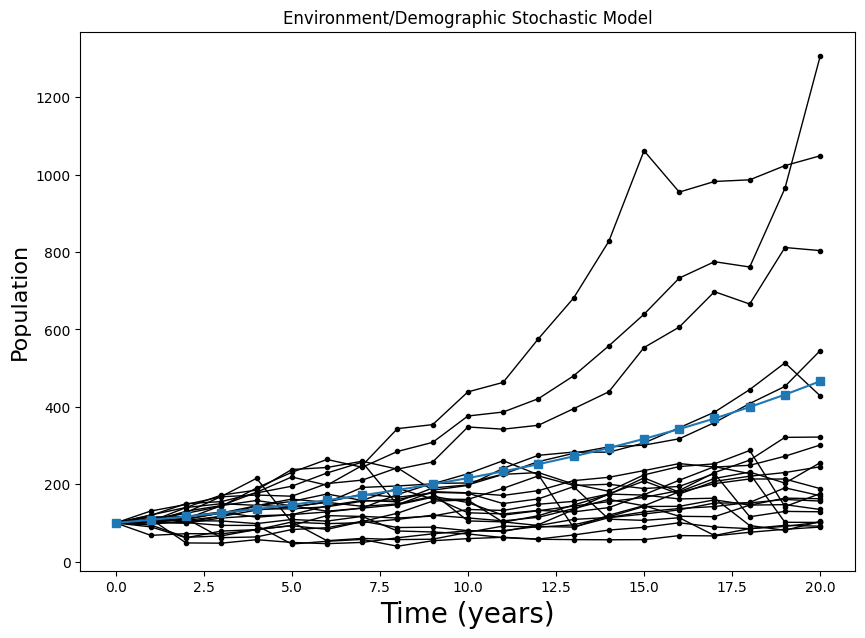

In [526]:
import matplotlib.pyplot as plt
fig, ax3 = plt.subplots(nrows= 1, ncols= 1, figsize = (10,7))

for i in range(years):
    plt.plot(df_env["Trial %s"%(i+1)], "k-o", linewidth = 1, markersize = 3)
plt.plot(df["Time"], df["Population"], marker = "s")
plt.title("Environment/Demographic Stochastic Model")
plt.xlabel("Time (years)", fontsize = 20)
plt.ylabel("Population", fontsize = 16)

# Environmental / Demographic Stochasticity

Based off the Environmental/Stochastic model, the effects of the demographic stochasticity is much more pronounced. In comparing this model to the isolated demogrpahic and isolated environmental model, the enviromental/demographic model is more more similar to the demographic model. A notable difference however, is that for the majority of the trials, the population is more likely to be less than the deterministic model. This is different from the demographic stocahisticity because the population was generally evenly distributed above and below the deterministic population, especially within the first 10 years.